In [151]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import itertools
from IPython.core.display import display, HTML
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.api import OLS

display(HTML("<style>.container { width : 98% !important; }</style>"))

pd.set_option('display.max_columns',500)

In [152]:
## Reading in and taking a look at the pricing / quantity dataframe

beef_price = 'https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/beef.csv'
beef_df = pd.read_csv(beef_price, index_col=0)
cols1 = beef_df.columns
cols2=[]

for x in cols1:
    cols2.append(x.lower().strip().replace(" ",'_'))
beef_df.columns=cols2
beef_df

,quarter,quantity,price
Year,,,
1977,1,22.9976,142.1667
1977,2,22.6131,143.9333
1977,3,23.4054,146.5000
1977,4,22.7401,150.8000
1978,1,22.0441,160.0000
...,...,...,...
1998,3,17.5085,277.3667
1998,4,16.6475,279.5333
1999,1,16.6785,278.0000


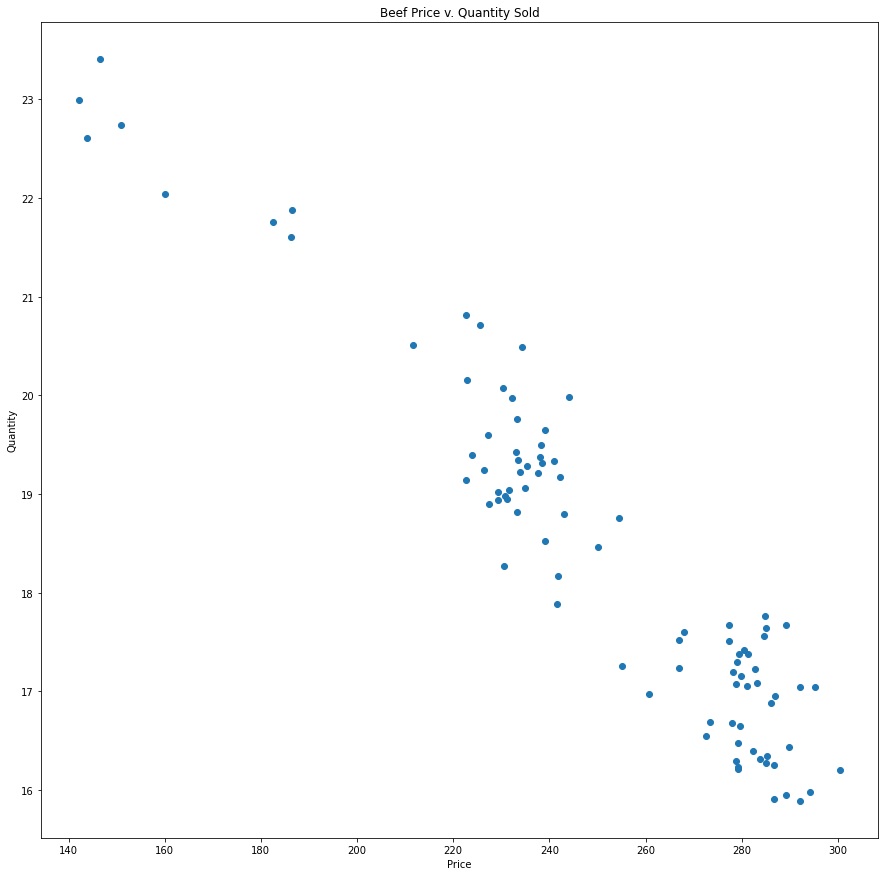

In [155]:
## Creating a Scatter Plot for the Price / Quantity combinations

x = np.array(beef_df['price'])
y = np.array(beef_df['quantity'])
plt.figure('figsize',(15,15))
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title("Beef Price v. Quantity Sold")

plt.scatter(x, y)
plt.show()

In [156]:
# Reshaping, creating, and running an sk-learn Linear Regression Model, examining the details of the model

x=x.reshape(-1,1)
y=y.reshape(-1,1)

sk_ols = LinearRegression()
sk_ols.fit(x,y)
coef = sk_ols.coef_
inter = sk_ols.intercept_
r2 = sk_ols.score(x,y)

print('Coef',coef,'Intercept',inter,'Score',r2)

Coef [[-0.04651079]] Intercept [30.05148583] Score 0.901137462166058


In [157]:
# Getting a more complete summary of the original least squares model

x1=sm.add_constant(x)
stats_ols = OLS(y,x1).fit()
print(stats_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.69e-46
Time:                        20:26:55   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0515      0.413     72.701      0.0

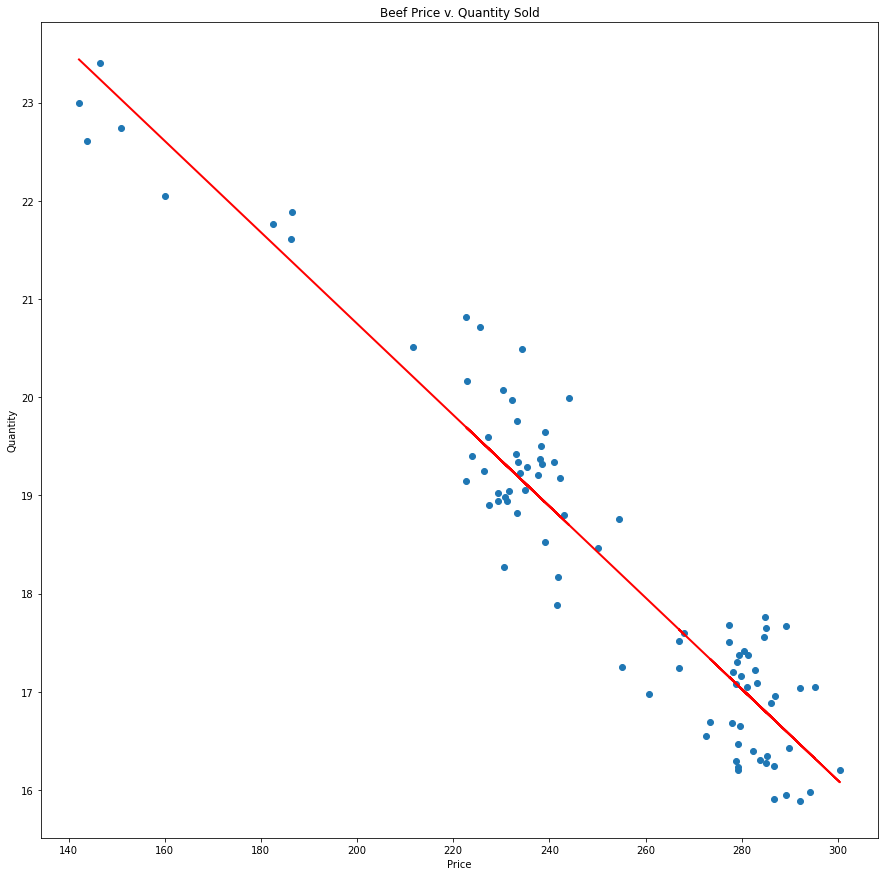

In [158]:
## Plotting the regression line (red line) alongside the scatter plot of actual data (blue dots)

x = np.array(beef_df['price'])
y = np.array(beef_df['quantity'])


plt.figure('figsize',(15,15))
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title("Beef Price v. Quantity Sold")
preds = stats_ols.predict(x1)

plt.scatter(x, y)
plt.plot(x,preds,linewidth='2',color='r')
plt.show()

In [159]:
## Doing a price optimization project for a company, typically the company would be looking to find the price that either optimizes 1. Revenue or  2. Gross Margin
## I'll do an example to maximize Revenue and another to maximize Gross Margin

## Maximizing Revenue

In [160]:
beef_df['revenue'] = beef_df['quantity'] * beef_df['price']

price_range = np.arange(140,400,5)
price_range.flatten()
price_range=price_range.reshape(-1,1)
# # beef_df

# # pd.DataFrame
price_range
qty = sk_ols.predict(price_range)


results_rev = pd.DataFrame({'price':price_range.flatten(),'quantity':qty.flatten()})
results_rev['revenue'] = results_rev['price'] * results_rev['quantity']
results_rev

,price,quantity,revenue
0,140,23.539975,3295.596443
1,145,23.307421,3379.575989
2,150,23.074867,3461.229997
3,155,22.842313,3540.558464
4,160,22.609759,3617.561392
5,165,22.377205,3692.238780
6,170,22.144651,3764.590628
7,175,21.912097,3834.616936
8,180,21.679543,3902.317705
9,185,21.446989,3967.692934


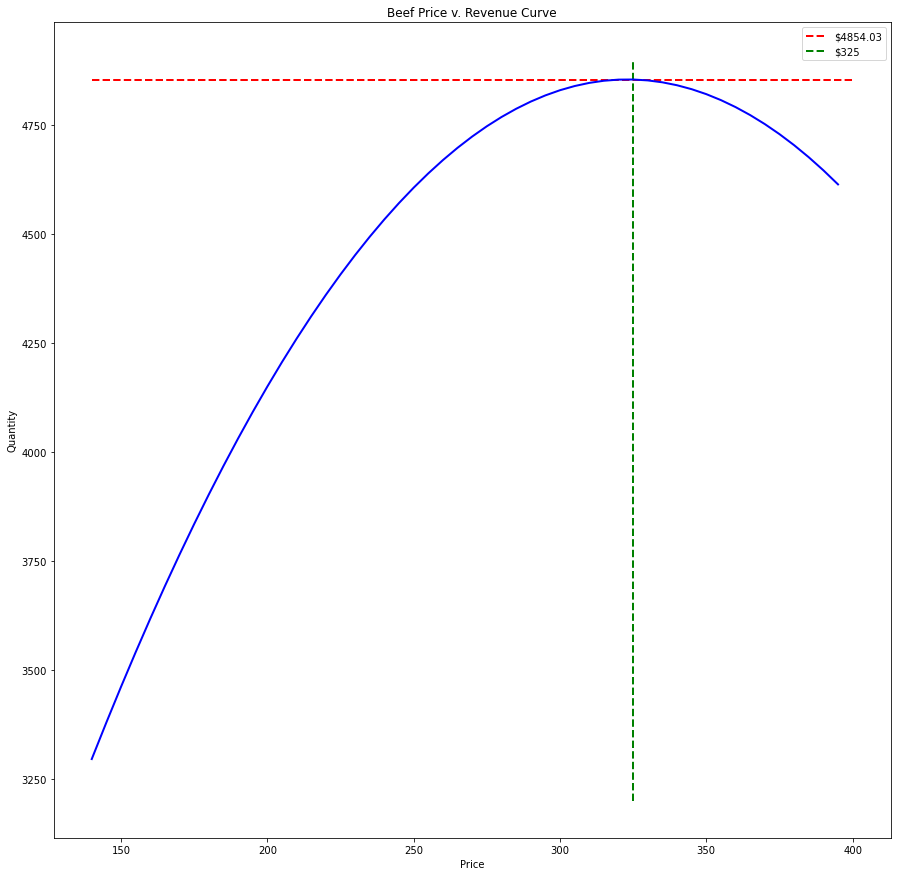

In [161]:
x_rev = results_rev['price']
y_rev = results_rev['revenue']

plt.figure('figsize',(15,15))
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title("Beef Price v. Revenue Curve")
plt.hlines(y= results_rev[results_rev['revenue']==max(results_rev['revenue'])]['revenue'], xmin= 140, xmax= 400, color='red', linestyle ='dashed', linewidth = 2,label='$4854.03')
plt.vlines(x= results_rev[results_rev['revenue']==max(results_rev['revenue'])]['price'], ymin= 3200, ymax= 4900, color='green', linestyle ='dashed', linewidth = 2,label='$325')

plt.legend()
plt.plot(x_rev,y_rev,linewidth='2',color='b')
plt.show()

In [162]:
results_rev[results_rev['revenue']==max(results_rev['revenue'])]

,price,quantity,revenue
37,325,14.935478,4854.030218


## Maximizing Gross Margin (Profit)

In [163]:
## In order to find a price that maximizes gross margin, I would need to know mean costs associated with each Quarter's price -- I don't have this data,
## so I am going to just assume a flat, constant unit cost at 75 (not realistic that it wouldn't change over such a long period, but this is just an example)

In [170]:
results_gm = results_rev.copy()

results_gm['cost_per_unit'] = 75
results_gm['total_cost'] = results_gm['cost_per_unit'] * results_gm['quantity']
results_gm['profit'] = results_gm['revenue'] - results_gm['total_cost']
results_gm

,price,quantity,revenue,cost_per_unit,total_cost,profit
0,140,23.539975,3295.596443,75,1765.498094,1530.098348
1,145,23.307421,3379.575989,75,1748.056546,1631.519443
2,150,23.074867,3461.229997,75,1730.614998,1730.614998
3,155,22.842313,3540.558464,75,1713.173450,1827.385014
4,160,22.609759,3617.561392,75,1695.731902,1921.829489
5,165,22.377205,3692.238780,75,1678.290354,2013.948425
6,170,22.144651,3764.590628,75,1660.848806,2103.741822
7,175,21.912097,3834.616936,75,1643.407258,2191.209678
8,180,21.679543,3902.317705,75,1625.965711,2276.351995
9,185,21.446989,3967.692934,75,1608.524163,2359.168772


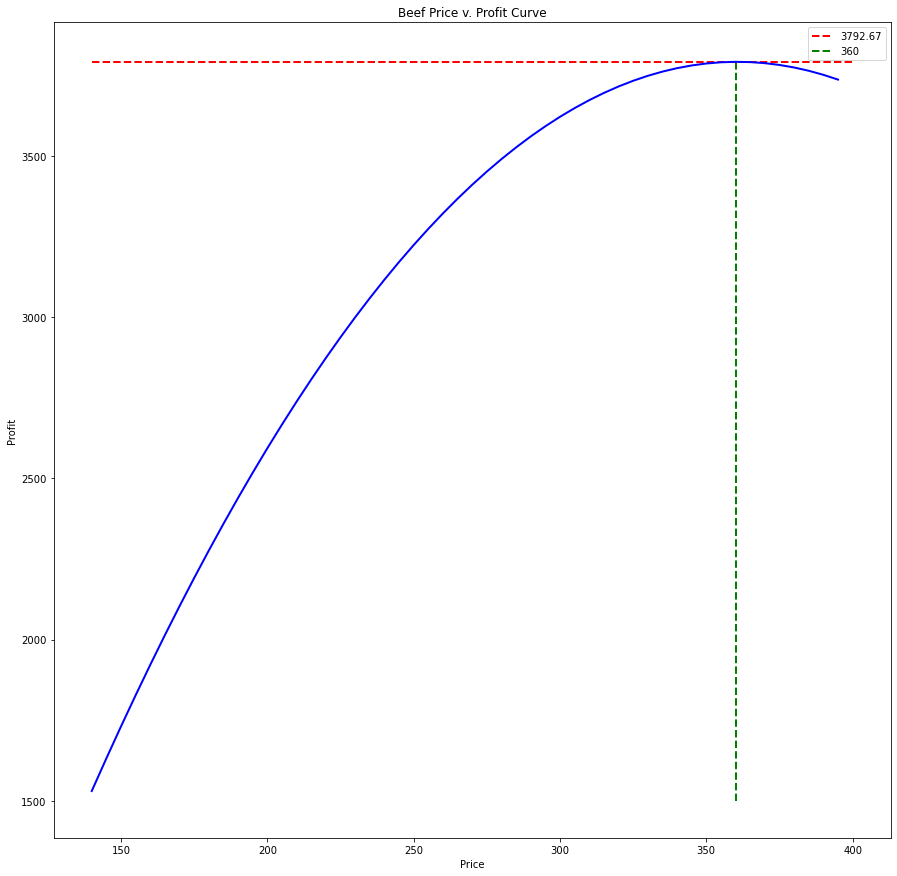

In [179]:
x_gm = results_gm['price']
y_gm = results_gm['profit']

A = round(results_gm[results_gm['profit']==max(results_gm['profit'])]['profit'].values[0],2)
B = results_gm[results_gm['profit']==max(results_gm['profit'])]['price'].values[0]

plt.figure('figsize',(15,15))
plt.xlabel('Price')
plt.ylabel('Profit')
plt.title("Beef Price v. Profit Curve")
plt.hlines(y= results_gm[results_gm['profit']==max(results_gm['profit'])]['profit'], xmin= 140, xmax= 400, color='red', linestyle ='dashed', linewidth = 2,label=A)
plt.vlines(x= results_gm[results_gm['profit']==max(results_gm['profit'])]['price'], ymin= 1500, ymax= 3800, color='green', linestyle ='dashed', linewidth = 2,label=B)

plt.legend()
plt.plot(x_gm,y_gm,linewidth='2',color='b')
plt.show()

### Other problem sets for price optimization

In [1]:
# dataset2 = pd.read_csv('/Users/APinkerton/Downloads/retail_price.csv')
# dataset2.groupby(['product_id'])[['unit_price']].agg('nunique').reset_index().nlargest(5,columns='unit_price')


In [2]:
# dataset3 = pd.read_csv('/Users/APinkerton/Downloads/archive (15)/promo_results.csv')
# customers3 = pd.read_csv('/Users/APinkerton/Downloads/archive (15)/user_data.csv')